# 🎬 **Mini-Project**: *Exploring Variability in Movie Ratings Across Genres Over Time*
---

## 📊 **Project Overview**
This mini-project investigates whether **user ratings for movies** vary significantly across genres and whether certain genres are consistently rated higher than others over time.

---

### 🔍 **Key Question**
- Do user ratings for movies vary significantly across genres?
- Are certain genres consistently rated higher than others over time?

---

### 📂 **Dataset**
The analysis is based on data from **IMDB**, a comprehensive database of movie ratings and information.

---

## Preparation

In [405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Loading the datasets

In [6]:
df_ratings = pd.read_csv('./ml-25m/ratings.csv')
df_tags = pd.read_csv('./ml-25m/tags.csv')
df_links = pd.read_csv('./ml-25m/links.csv')
df_genome_scores = pd.read_csv('./ml-25m/genome-scores.csv')
df_genome_tags = pd.read_csv('./ml-25m/genome-tags.csv')
df_movies = pd.read_csv('./ml-25m/movies.csv')

## Data overview

In [8]:
df_sortByRatings = df_ratings.sort_values(by='rating', ascending=False)

In [11]:
df_ratings.info()
print(df_ratings.isnull().sum())
df_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [13]:
df_ratings['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [35]:
# adding a date release column and deleting the timestamp
df_ratings['release date'] = pd.to_datetime(df_ratings['release date']).dt.date
# del df_ratings['timestamp']
df_ratings.head()

,userId,movieId,rating,release date
0,1,296,5.0,2006-05-17
1,1,306,3.5,2006-05-17
2,1,307,5.0,2006-05-17
3,1,665,5.0,2006-05-17
4,1,899,3.5,2006-05-17


## Joining movies and ratings datasets to have one complete dataframe

In [356]:
df_movieRatings = pd.merge(df_ratings, df_movies, on='movieId', how='right')

In [358]:
df_movieRatings.info()
df_movieRatings.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25003471 entries, 0 to 25003470
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   userId        float64
 1   movieId       int64  
 2   rating        float64
 3   release date  object 
 4   title         object 
 5   genres        object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ GB


,userId,movieId,rating,release date,title,genres
25003466,119571.0,209157,1.5,2019-11-20,We (2018),Drama
25003467,115835.0,209159,3.0,2019-11-20,Window of the Soul (2001),Documentary
25003468,6964.0,209163,4.5,2019-11-20,Bad Poems (2018),Comedy|Drama
25003469,119571.0,209169,3.0,2019-11-20,A Girl Thing (2001),(no genres listed)
25003470,119571.0,209171,3.0,2019-11-20,Women of Devil's Island (1962),Action|Adventure|Drama


## Data visualization


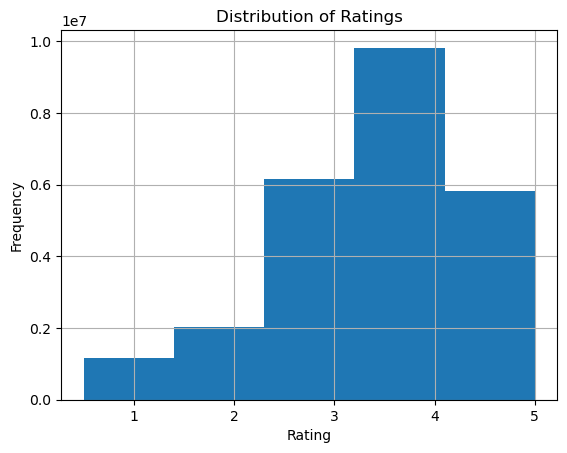

In [244]:
# Distribution of ratings
df_movieRatings['rating'].plot(kind='hist', bins=5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

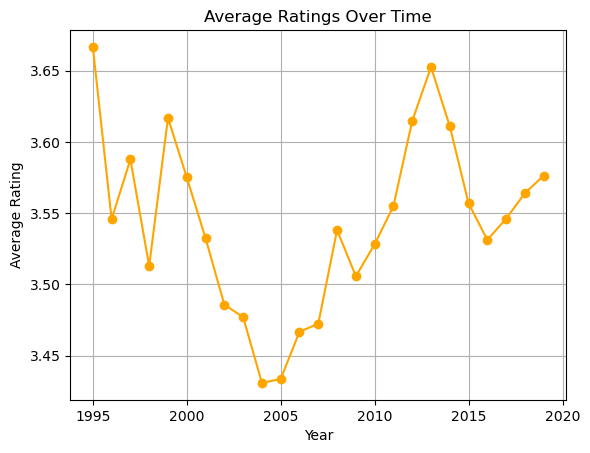

In [261]:
# Average ratings over time

avg_ratings = df_movieRatings.groupby(df_movieRatings['release date'].dt.year)['rating'].mean()
avg_ratings.plot(kind='line', marker='o', color='orange')
plt.title('Average Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

## **Exploring the Research Question**
💡 **Question:**  

**Do users ratings for movies vary significantly across genres, and are certain genres consistently rated higher than others over time?**

### **Count the number of occurences for each genre**

In [423]:
df_exploded['genres'].value_counts()

genres
Drama          10963974
Comedy          8927049
Action          7447353
Thriller        6763596
Adventure       5832701
Romance         4497705
Sci-Fi          4325833
Crime           4190554
Fantasy         2831649
Children        2124327
Mystery         2011138
Horror          1892426
Animation       1631005
War             1267450
IMAX            1063279
Musical          964289
Western          483974
Documentary      322601
Film-Noir        247231
Name: count, dtype: int64

In [360]:
# Split genres into individual values and explode
df_movieRatings['genres'] = df_movieRatings['genres'].str.split('|')
df_exploded = df_movieRatings.explode('genres')
df_exploded = df_exploded[df_exploded['genres'] != '(no genres listed)']
rating_genre = df_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)

### **Plot average rating by genre as a bar chart**


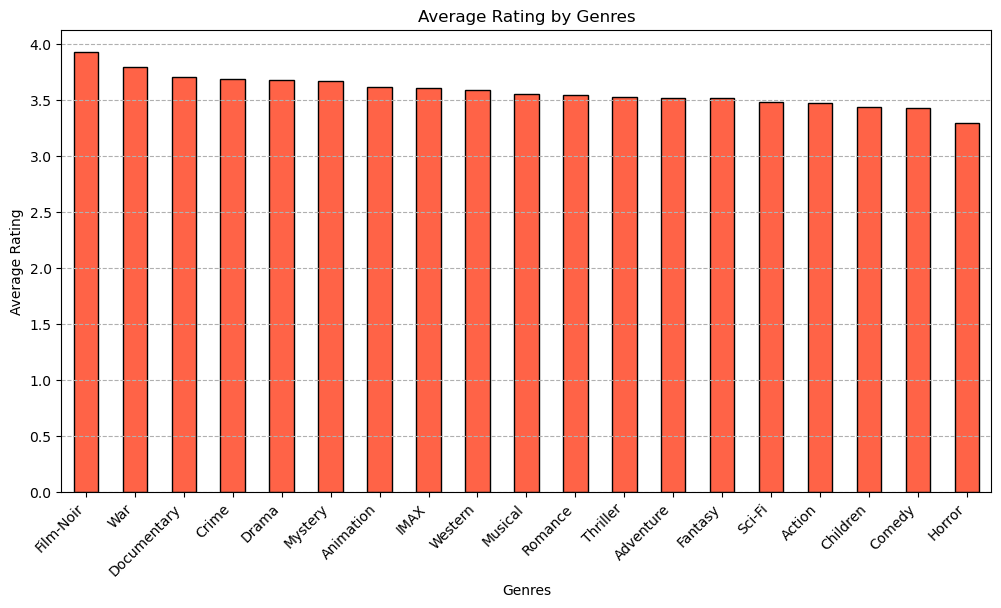

In [398]:
# Plot average rating by genre as a bar chart
rating_genre.plot(kind='bar', color='tomato', edgecolor='black', figsize=(12,6))
plt.title('Average Rating by Genres')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

## Explanation of Data Processing

### 1. **Extracting Release Year**
- Extracted the year and saved it as a new column `'release year'`.

### 2. **Calculating Average Ratings by Genre and Year**
- Grouped the data by `'genres'` and `'release year'`.
- Calculated the mean rating for each combination and flattened the results into a DataFrame.

### 3. **Filtering the Top 10 Most Common Genres**
- Identified the top 10 genres based on their occurrence.
  
### 3. **Plotting Average Ratings of Top Genres Over Time**
- Filtered the dataset to include only rows corresponding to these genres.
- Created a line plot to visualize the average ratings of the top genres using seaborn.



In [404]:
['release year'] = pd.to_datetime(df_exploded['release date']).dt.year
ratingsByGenreYear = df_exploded.groupby(['genres','release year'])['rating'].mean().reset_index()


In [416]:
# Identifies the top 10 most common genres
top_genres = df_exploded['genres'].value_counts().head(10).index

# Filter the dataset to include only rows for these genres
df_top_genres = df_exploded[df_exploded['genres'].isin(top_genres)]
ratings_by_genre_year = df_exploded.groupby(['genres', 'release year'])['rating'].mean().reset_index()


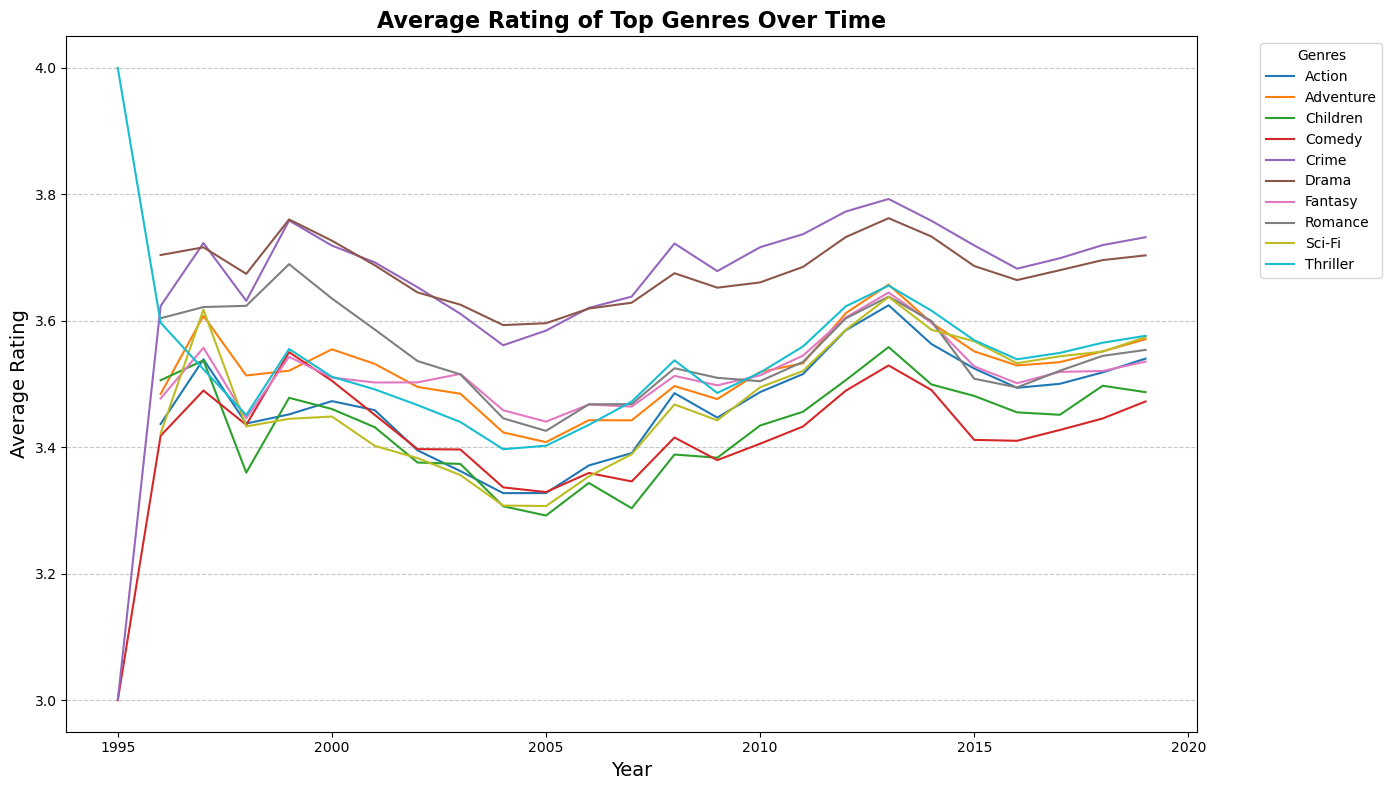

In [418]:
filtered_ratings = ratings_by_genre_year[ratings_by_genre_year['genres'].isin(top_genres)]

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_ratings, x='release year', y='rating', hue='genres', palette='tab10')

plt.title('Average Rating of Top Genres Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
